<a href="https://colab.research.google.com/github/AryanBagoria/Deepfake_Detection/blob/main/Deepfake_2nd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LIBRARY**

In [ ]:
!pip install tensorflow keras numpy matplotlib pandas scikit-learn plotly


ADD GPU

In [ ]:
import tensorflow as tf

tf.test.gpu_device_name()


''

CONFIG FOR GPU GROWTH

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

ADD DATASET ONTO GOOGLE DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/dataset/


/content/drive/MyDrive/dataset


In [ ]:
import sys
import sklearn
import tensorflow as tf

import cv2
import pandas as pd
import numpy as np

import plotly.graph_objs as go
from plotly.offline import iplot
from matplotlib import pyplot as plt

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
import matplotlib.pyplot as plt

def show_images_with_labels(images, labels, num_samples=5):
    # for random sample
    sample_indices = np.random.choice(len(images), num_samples, replace=False)

    # Plot the images with labels
    for i, index in enumerate(sample_indices):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[index])
        plt.title(f"Label: {int(labels[index])}")
        plt.axis('on')

    plt.show()

In [ ]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
# paths for real and fake images folders
real_images_path = "/content/drive/MyDrive/dataset/real/"
fake_images_path = "/content/drive/MyDrive/dataset/fake/"

# Loading real and fake images into separate lists
real_images = []
fake_images = []

for filename in os.listdir(real_images_path):
    real_images.append(Image.open(os.path.join(real_images_path, filename)))

for filename in os.listdir(fake_images_path):
    fake_images.append(Image.open(os.path.join(fake_images_path, filename)))

RESIZING IMAGES AND CONVERTING IMAGES INTO NUMPY ARRAY

In [ ]:
target_size = (224, 224) # IMAGE SIZE

real_images_arr = [] # CONVERSION OF REAL IMAGES INTO NumPy arrays & RESIZE
for image in real_images:
    image = image.resize(target_size)
    real_images_arr.append(np.asarray(image))

fake_images_arr = [] # CONVERSION OF FAKE IMAGES INTO NumPy arrays & RESIZE
for image in fake_images:
    image = image.resize(target_size)
    fake_images_arr.append(np.asarray(image))

NORMALIZING THE PIXEL VALUES FROM 0 TO 1

In [ ]:
# Convert the list of real images to a NumPy array
real_images_arr = np.asarray(real_images_arr)

# Convert the list of fake images to a NumPy array
fake_images_arr = np.asarray(fake_images_arr)

real_images_arr = real_images_arr / 255.0 # Normalize real image pixel values

fake_images_arr = fake_images_arr / 255.0 # Normalize fake image pixel values

COMBINING ARRAYS & LABELING THEM

In [ ]:
images_arr = np.concatenate((real_images_arr, fake_images_arr)) #Single array containing all images

# Defining labels for real and fake images
real_labels = np.zeros(len(real_images))
fake_labels = np.ones(len(fake_images))

# Combine labels into a single array
labels = np.concatenate((real_labels, fake_labels))


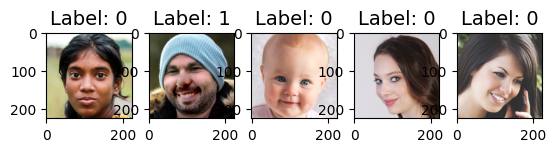

In [ ]:
show_images_with_labels(images_arr, labels)

SPLITTING DATA INTO TRAINING AND TESTING

In [ ]:
# test size (30%)
test_size = 0.3

train_images, test_images, train_labels, test_labels = train_test_split(images_arr, labels, test_size=test_size, random_state=42)


VALIDATION

In [ ]:
# validation size (25% of remaining training data)
validation_size = 0.25

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=validation_size, random_state=42)


In [ ]:
print(f"Number of training images: {len(train_images)}")
print(f"Number of validation images: {len(val_images)}")
print(f"Number of testing images: {len(test_images)}")


Number of training images: 1071
Number of validation images: 357
Number of testing images: 613


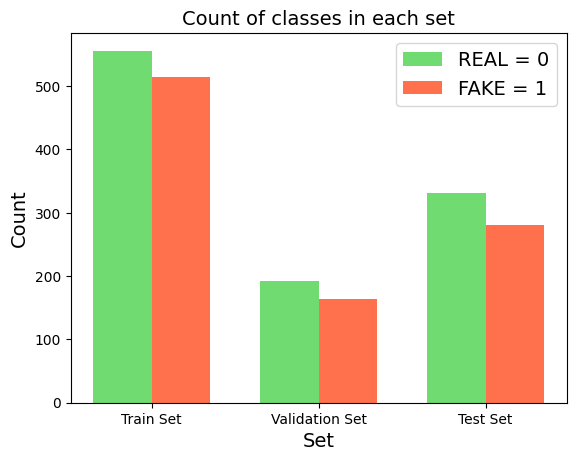

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each class in each set
train_counts = np.unique(train_labels, return_counts=True)[1]
val_counts = np.unique(val_labels, return_counts=True)[1]
test_counts = np.unique(test_labels, return_counts=True)[1]

# Plotting
labels = ['Train Set', 'Validation Set', 'Test Set']
real_counts = [train_counts[0], val_counts[0], test_counts[0]]
fake_counts = [train_counts[1], val_counts[1], test_counts[1]]

fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.7

rects1 = ax.bar(np.arange(len(labels)), real_counts, bar_width, label='REAL = 0', color='#33cc33', alpha=opacity)
rects2 = ax.bar(np.arange(len(labels)) + bar_width, fake_counts, bar_width, label='FAKE = 1', color='#ff3300', alpha=opacity)

ax.set_xlabel('Set')
ax.set_ylabel('Count')
ax.set_title('Count of classes in each set')
ax.set_xticks(np.arange(len(labels)) + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


In [ ]:
import tensorflow as tf

In [ ]:
def retrieve_dataset(data_set):
    images_arr = np.array(data_set['images'])
    labels_arr = np.array(data_set['label'])
    return images_arr, labels_arr

In [ ]:
def retrieve_dataset(images_arr, labels):
    return np.array(images_arr), np.array(labels)

X_train, y_train = retrieve_dataset(train_images, train_labels)
X_val, y_val = retrieve_dataset(val_images, val_labels)
X_test, y_test = retrieve_dataset(test_images, test_labels)

# Network Architecture

In [ ]:
from functools import partial
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile Model

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val))


Epoch 1/5
17/17 [==============================] - 32s 2s/step - loss: 0.9695 - accuracy: 0.5294 - val_loss: 0.6899 - val_accuracy: 0.5406
Epoch 2/5
17/17 [==============================] - 30s 2s/step - loss: 0.6901 - accuracy: 0.5322 - val_loss: 0.6888 - val_accuracy: 0.5378
Epoch 3/5
17/17 [==============================] - 30s 2s/step - loss: 0.6857 - accuracy: 0.5518 - val_loss: 0.6769 - val_accuracy: 0.5742
Epoch 4/5
17/17 [==============================] - 29s 2s/step - loss: 0.6541 - accuracy: 0.5994 - val_loss: 0.6713 - val_accuracy: 0.5910
Epoch 5/5
17/17 [==============================] - 29s 2s/step - loss: 0.6250 - accuracy: 0.6499 - val_loss: 0.6873 - val_accuracy: 0.5966


In [ ]:
model.save('my_model.1DF')

In [ ]:
score = model.evaluate(X_test, y_test)

20/20 [==============================] - 4s 216ms/step - loss: 0.6856 - accuracy: 0.5791


In [ ]:
val_loss, val_acc = model.evaluate(val_images, val_labels)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"Validation accuracy: {val_acc}")
print(f"Test accuracy: {test_acc}")


20/20 [==============================] - 5s 244ms/step - loss: 0.6856 - accuracy: 0.5791
Validation accuracy: 0.5966386795043945
Test accuracy: 0.579119086265564


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
y_pred = model.predict(X_test)

20/20 [==============================] - 4s 216ms/step


In [ ]:
y_pred_binary = (y_pred > 0.5).astype(int)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5791190864600326


In [ ]:
f1 = f1_score(y_test, y_pred_binary)
print(f'F1 Score: {f1}')

F1 Score: 0.5441696113074205


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[201 131]
 [127 154]]


In [ ]:
pip install seaborn

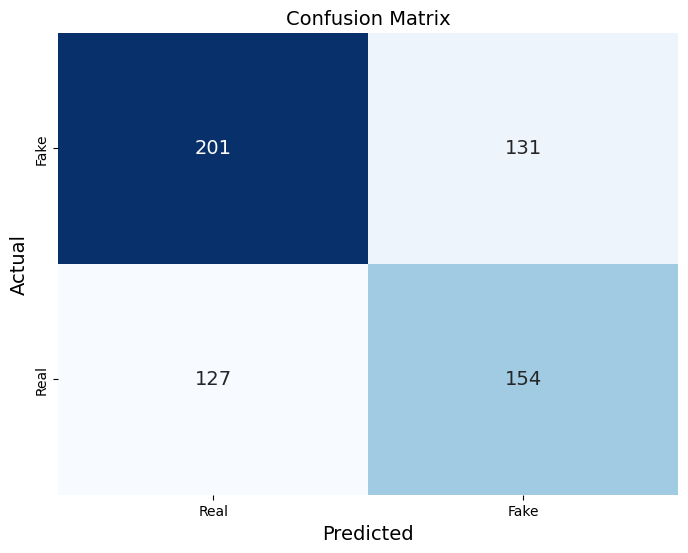

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_binary are defined

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Real', 'Fake'],
            yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import random

In [ ]:
random_index = random.randint(0, len(X_test) - 1)
random_image = X_train[random_index]
random_label = y_train[random_index]

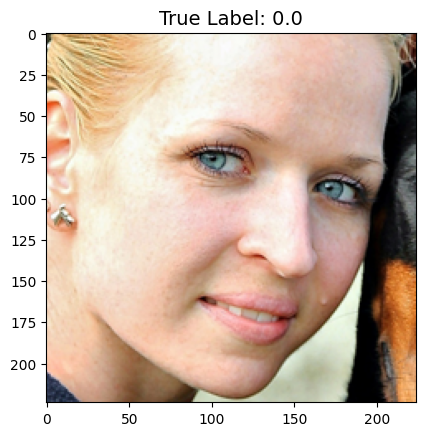

In [ ]:
plt.imshow(random_image)
plt.title(f"True Label: {random_label}")
plt.show()

In [ ]:
random_image = np.reshape(random_image, (1, 224, 224, 3))

In [ ]:
prediction = model.predict(random_image)

1/1 [==============================] - 0s 34ms/step


In [ ]:
predicted_label = 1 if prediction > 0.5 else 0

In [ ]:
print(f"Model Prediction: {predicted_label}")

Model Prediction: 0
